In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sess = tf.InteractiveSession()

Product of two numbers with tensorflow. For example let's multiply 5 and 12

In [4]:
a = tf.placeholder('int64', name="input_a")
b = tf.placeholder('int64', name="input_b")
result = a * b

print(sess.run(result, {a: 7, b: 12}))

84


In [7]:
!pip install sklearn

    100% |████████████████████████████████| 8.2MB 146kB/s ta 0:00:011
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /Users/kirill/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Linear regression

In [10]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score

input_x = tf.placeholder('float32', shape=[None, 3], name='x')
input_y = tf.placeholder('float32', shape=[None], name='y')

weights = tf.Variable(initial_value=np.random.rand(3, 1) * 0.01, dtype='float32')
sess.run(tf.global_variables_initializer())

predicted_y = tf.matmul(input_x, weights)[:, 0]
loss = tf.reduce_mean((input_y - predicted_y) ** 2)
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

x = np.linspace(0, 1, 100)
xx = x + 0.01 * np.random.normal(size=100)
X_train = np.vstack((np.ones(100), xx, xx ** 2)).T
y_train = x ** 2 + x + 1

x = np.linspace(1, 1.3, 30)
X_test = np.vstack((np.ones(30), x, x ** 2)).T


for i in range(1000):
    loss_i, _ = sess.run([loss, train_step], {input_x: X_train, input_y: y_train})
    print("loss at iter %i: %.4f" % (i, loss_i))

loss at iter 0: 3.6592
loss at iter 1: 3.4575
loss at iter 2: 3.2671
loss at iter 3: 3.0872
loss at iter 4: 2.9174
loss at iter 5: 2.7570
loss at iter 6: 2.6056
loss at iter 7: 2.4626
loss at iter 8: 2.3276
loss at iter 9: 2.2001
loss at iter 10: 2.0797
loss at iter 11: 1.9660
loss at iter 12: 1.8586
loss at iter 13: 1.7573
loss at iter 14: 1.6615
loss at iter 15: 1.5711
loss at iter 16: 1.4857
loss at iter 17: 1.4051
loss at iter 18: 1.3290
loss at iter 19: 1.2571
loss at iter 20: 1.1892
loss at iter 21: 1.1251
loss at iter 22: 1.0645
loss at iter 23: 1.0073
loss at iter 24: 0.9533
loss at iter 25: 0.9023
loss at iter 26: 0.8541
loss at iter 27: 0.8086
loss at iter 28: 0.7657
loss at iter 29: 0.7251
loss at iter 30: 0.6868
loss at iter 31: 0.6506
loss at iter 32: 0.6164
loss at iter 33: 0.5841
loss at iter 34: 0.5536
loss at iter 35: 0.5248
loss at iter 36: 0.4976
loss at iter 37: 0.4718
loss at iter 38: 0.4476
loss at iter 39: 0.4246
loss at iter 40: 0.4030
loss at iter 41: 0.3825
lo

loss at iter 615: 0.0028
loss at iter 616: 0.0028
loss at iter 617: 0.0027
loss at iter 618: 0.0027
loss at iter 619: 0.0027
loss at iter 620: 0.0027
loss at iter 621: 0.0027
loss at iter 622: 0.0027
loss at iter 623: 0.0027
loss at iter 624: 0.0027
loss at iter 625: 0.0027
loss at iter 626: 0.0027
loss at iter 627: 0.0026
loss at iter 628: 0.0026
loss at iter 629: 0.0026
loss at iter 630: 0.0026
loss at iter 631: 0.0026
loss at iter 632: 0.0026
loss at iter 633: 0.0026
loss at iter 634: 0.0026
loss at iter 635: 0.0026
loss at iter 636: 0.0026
loss at iter 637: 0.0025
loss at iter 638: 0.0025
loss at iter 639: 0.0025
loss at iter 640: 0.0025
loss at iter 641: 0.0025
loss at iter 642: 0.0025
loss at iter 643: 0.0025
loss at iter 644: 0.0025
loss at iter 645: 0.0025
loss at iter 646: 0.0025
loss at iter 647: 0.0024
loss at iter 648: 0.0024
loss at iter 649: 0.0024
loss at iter 650: 0.0024
loss at iter 651: 0.0024
loss at iter 652: 0.0024
loss at iter 653: 0.0024
loss at iter 654: 0.0024


In [15]:
predicted_values = sess.run(predicted_y, {input_x: X_test})

In [16]:
predicted_values

array([ 2.95023203,  2.97963476,  3.00922942,  3.03901625,  3.06899524,
        3.09916639,  3.12952924,  3.16008472,  3.19083166,  3.22177076,
        3.25290203,  3.28422546,  3.31574106,  3.34744883,  3.37934828,
        3.41144037,  3.44372392,  3.47619963,  3.50886774,  3.54172754,
        3.57477951,  3.60802364,  3.64145994,  3.67508841,  3.70890903,
        3.74292135,  3.77712584,  3.81152248,  3.8461113 ,  3.8808918 ], dtype=float32)

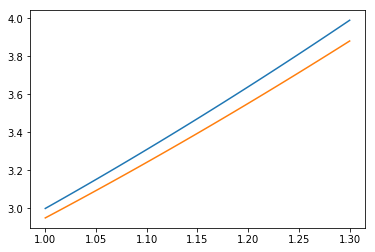

In [17]:
x = np.linspace(1,1.3,30)
plt.plot(x, x ** 2 + x + 1, x, predicted_values)

In [18]:
print(weights.eval())

[[ 1.01467502]
 [ 1.03813994]
 [ 0.89741719]]


## Logistic regression

In [14]:
from sklearn.datasets import load_digits
X, y = load_digits(2, return_X_y=True)

print("y [shape - %s]:" % (str(y.shape)), y[:10])
print("X [shape - %s]:" % (str(X.shape)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp5zlmhb8b', '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff6b0371080>, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_log_step_count_steps': 100, '_eval_distribute': None, '_task_id': 0, '_tf_random_seed': None, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_device_fn': None, '_master': '', '_keep_checkpoint_max': 5, '_experimental_distribute': None, '_is_chief': True, '_protocol': None, '_save_checkpoints_secs': 600, '_task_type': 'worker', '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_evaluation_master': '', '_train_distribute': None}


<generator object Estimator.predict at 0x7ff69da298e0>